# Simple Linear Regression (y= β0+ β1x1+Ɛ)

## Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

### **Load Data**

In [2]:
data=pd.read_csv('Data/Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


**Why would i predict GPA with SAT** ? 
* The SAT is considered one of the best estimators of intellectual capacity and capability
*  Almost all collage (ex: USA) are using the SAT as a proxy for admission
* The SAT stood the test of time

**SAT** = Critical reading + Mathematics + Writing <br>
**GPA** = Grade Point Average

Creating a linear regression which predicts GPA based on the SAT score

In [3]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## **Create first regression**

### **Define dependent and the independent variables**

In [5]:
y=data['GPA']
x=data['SAT']

### Explore The Data

Text(0, 0.5, 'GPA')

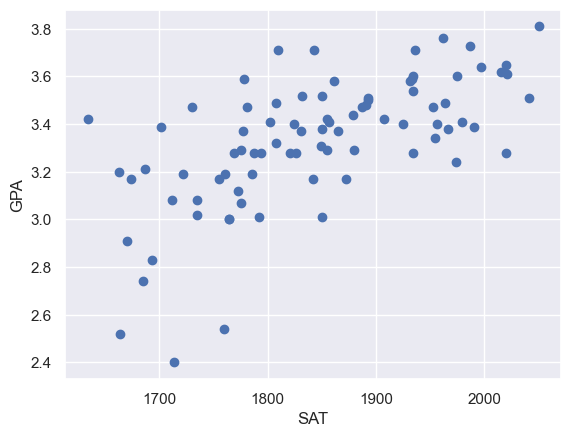

In [6]:
plt.scatter(x,y)
plt.xlabel('SAT')
plt.ylabel('GPA')

 ## Regression itself

In [7]:
# y=b0+b1x1

x1=sm.add_constant(x)

results=sm.OLS(y,x1).fit()
#Contain Ordinary Least Square Regression 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           7.20e-11
Time:                        19:53:08   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **How to read the OLS Regression Above**

Stat Models has 3 main tables :
* A Model Summary
* Coefficients table
* Some Adittional Test

**Coefficient Table** <br>
0.2750 means b0 <br>
0.0017 means b1

yHat=b0+b1x1 <br>
yHat = 0.2750+0.0017*x1 <br>
GPA = 0.2750+0.0017*SAT <br>
**std err ** shows the accuracy of prediction for each variable (Lower means better) <br>
SAT score is a significant variable when predicting GPA because SAT has 0.000 in **P> | t |**

**A Model Summary**
* Dep. Variable means variable that we want to predict , which is **GPA** 
* Model : OLS (Ordinary Least Square) , OLS is the common method to estimate the linear regression , **this method will find the line which minimises the Sum of the Squared Error** ( Lower Error = better explanatory power ) 

There is other method like : 
* Generalized least squares
* Maximum likelihood estimation
* Bayesian Regression
* Gaussian process regression

In this tutorial im using OLS because it quite simple and powerful enough 

**R-Squared** is measured how powerful the regression 
* R-Squared = Variability explained by the regression / Total variability of the dataset
* R-Squared using values ranging from 0 to 1 , if R-Squared = 0 means your regression explains NONE of the variability , if 1 means regression explains the ENTIRE variability

Example : Our R-Squared has 0.406 , in other words SAT scores explained 41% of variability of college grades , but since it is far away from 90% we may conclude that we are missing some important information . Other determinants must be consider such as gender,income or maybe marital status.

**Conclusion :** R- Squared measure goodness of fit , the more factore you include in regression the higher the R Squared 

**F-statistic :**  is important for regression as it give us some important insights (Higher mean Better), **the lower the F-Statistic the closer to an non-significant model** . You can use this tool to compare with other models . 









**Plotting the Simple Regression Line**

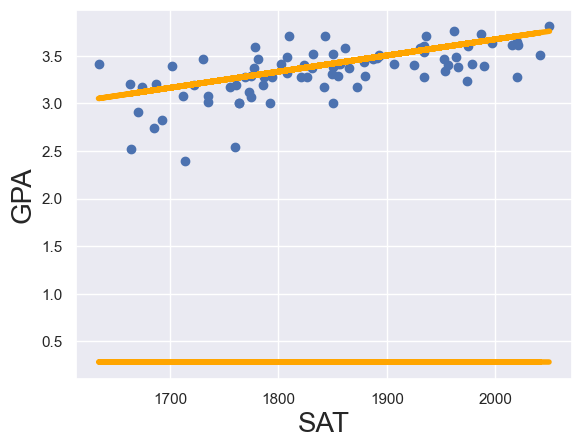

In [8]:
plt.scatter(x,y)
yhat=0.2750+0.0017*x1 #yHat=0.275+0.0017x1 Regression Line
fig=plt.plot(x,yhat, lw=4,c='orange',label='Regression Line')
plt.xlabel('SAT',fontsize='20')
plt.ylabel('GPA',fontsize='20')
plt.show()

# **Mutiple Linear Regression (y= β0+ β1x1+β2x2+...+βkxk + Ɛ)** 

Because GPA cannot be predicted solely by student as a score , but also by their HighSchool GPA , Income , Gender etc .  **If we want a good models , we need Multiple Regression , in order to address the higher complexity of problems**

I will use the Attendance variable for mutiple regression <br>
Note : If attendance is more than 75% is 1 , and if below 75% is 0


## **Load Data**

In [9]:
raw_data=pd.read_csv('Data/Multi linear regression.csv')
raw_data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [10]:
data=raw_data.copy()

In [11]:
#Change Yes=1 , and No = 0
data['Attendance']=data['Attendance'].map({'Yes':1,'No':0})
data.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [12]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


## **Mutiple Regression**

In [13]:
y=data['GPA']
x=data[['SAT','Attendance']]

In [14]:
x1=sm.add_constant(x)
results=sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           2.19e-15
Time:                        19:57:32   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

GPA = 0.6439+0.0014*SAT + 0.2226*Attendance <br>

If did not attend (Attendance = 0) <br>
GPA=0.6439+0.0014*SAT+0.2226 * 0<br>
GPA=0.6439+0.0014*SAT

If Attends (Attendance = 1) <br>
GPA=0.6439+0.0014*SAT+0.2226 * 1<br>
GPA=0.8665+0.0014*SAT



#### **Look at the R-Squared , Adj.R-Squared , and try to compare from the Simple Linear Regression , it explain that the Attendance variable can be such powerful variable for Mutiple Regression**

### Plotting The Data

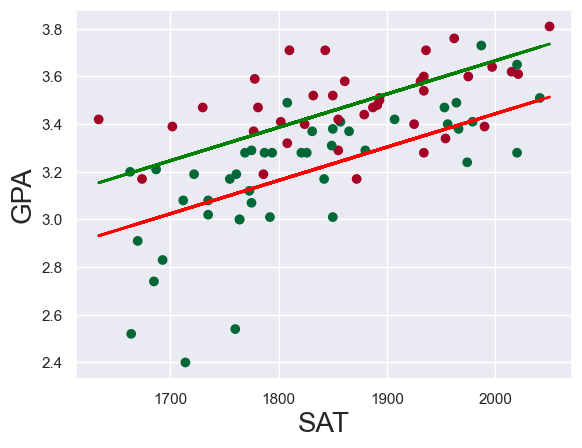

In [15]:
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap='RdYlGn_r')
yHat_no=0.6439+0.0014*data['SAT']
yHat_yes=0.8665+0.0014*data['SAT']
fig=plt.plot(data['SAT'],yHat_no,lw=2,c='red')
fig=plt.plot(data['SAT'],yHat_yes,lw=2,c='green')

plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

**The Red one is the one who attandance , and vice versa**

## **Make Predictions based on the regression we already create**

In [16]:
x1
# Const actually added with the add_constant() method we use prior to fitting the model , it is simulation of x0

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


We create new data that predict 2 students :
* Bob , who got 1700 on SAT and did **NOT attend**
* Alice , who got 1670 on SAT and **attended**

In [17]:
new_data=pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0,1]})
new_data=new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [18]:
#Rename the index 0:Bob and 1:Alice
new_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [19]:
#The appropriate method that allow us to predict the values is the fitted regression dot predict
#The fitted regressions for us is variable results , results= sm.OLS(y,x).fit()
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [20]:
#I will transform into a data frame and join it with the first one
predictionsDataFrame=pd.DataFrame({'Predictions':predictions})
joined=new_data.join(predictionsDataFrame)
joined.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


We can see that , the predicted GPA at graduation for Bob is 3.02 , and for Alice is 3.20 